In [52]:
import matplotlib.pyplot as plt
from math import comb
import numpy as np

In [53]:
# def get_prior(num_to_guess, n):
#     return comb(n-num_to_guess, int(n/2.) - num_to_guess) / (comb(n, int(n/2.)))

def get_prior_gen_membership(n, k):
    pr = 0.
    for k_prime in range(k):
        pr += comb(n, k_prime)*0.5**n
    return 1-pr

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.99999999999999, 99.9999999999999, 99.99999999999935, 99.99999999999586, 99.99999999997587, 99.9999999998697, 99.9999999993451, 99.99999999692609, 99.99999998648619, 99.99999994420456, 99.99999978313167, 99.99999920473358, 99.99999724320962, 99.9999909499869, 99.99997181858983, 99.99991663186752, 99.99976537936936, 99.99937104249916, 99.99839199923521, 99.9960749301772, 99.99084283875588, 99.97956114162866, 99.95631400815438, 99.91050348042566, 99.8241179138515, 99.66814397420369, 99.39835121373183, 98.95106321610741, 98.23998998911476, 97.15560331795096, 95.56869599429663, 93.33946903963934, 90.33260477521787, 86.43734879630827, 81.58991913366519, 75.79407931963542, 69.1350293205374, 61.78232827986666, 53.979461869358936, 46.020538130641064, 38.21767172013334, 30.8649706794626, 24.205920680364578, 18.41008086633481, 13.562651203691733, 9.667395224782116, 6.6605309603606555, 4.431304005703374, 2.84439668204

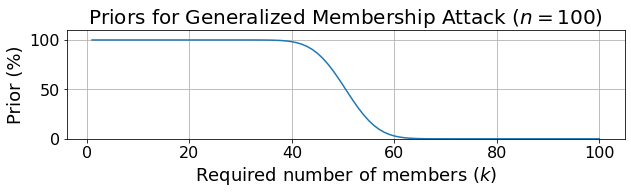

In [54]:
# true_x_vals =
plt.figure(figsize=(10, 2))
n=100

sorted_keys = list(range(1, 101))
priors = [100*get_prior_gen_membership(n, k) for k in sorted_keys]
print(priors)
plt.plot(sorted_keys, priors)

y_min, y_max = 0, 110
plt.ylim(y_min, y_max)

plt.ylabel("Prior (%)", fontsize=18)
plt.xlabel("Required number of members ($k$)", fontsize=18)
# ax.set_title(titles[ind], fontsize=14)
plt.grid(True)
plt.tick_params(axis='both', labelsize=16)
plt.title("Priors for Generalized Membership Attack ($n=100$)", fontsize=20)
plt.savefig('hybrid_figs/gen_member_prior.svg', bbox_inches = "tight")


In [51]:
get_prior_gen_membership(n, 58)

0.06660530960360656

In [41]:
def calc_posterior(mi, prior=0.5, prec = 100000):
    test_vals = [x / prec for x in range(1, prec)]
    max_t = None
    for t in test_vals:
        if t*np.log(t/prior)+(1-t)*np.log((1-t)/(1-prior)) <= mi:
            if  max_t is None or t > max_t:
                max_t = t
    return max_t

In [48]:
calc_posterior(1, prior=get_prior_gen_membership(n, 70))

0.13814